In [9]:
from tensorflow.python.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [10]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [11]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [17]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()

filepath="VGG16_Indus_Fruits_4_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                147488    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 132       
Total params: 14,862,308
Trainable params: 14,862,308
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 1600 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


In [19]:
number_of_training_samples=1600
number_of_validation_samples=160
number_of_test_samples=320

In [20]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Epoch 1/200
100/100 [==============================] - 25s 250ms/step - loss: 1.1248 - categorical_accuracy: 0.5400 - val_loss: 0.5433 - val_categorical_accuracy: 0.8375
Epoch 2/200
100/100 [==============================] - 21s 207ms/step - loss: 0.5087 - categorical_accuracy: 0.8356 - val_loss: 0.2229 - val_categorical_accuracy: 0.9187
Epoch 3/200
100/100 [==============================] - 21s 205ms/step - loss: 0.3239 - categorical_accuracy: 0.9075 - val_loss: 0.1247 - val_categorical_accuracy: 0.9750
Epoch 4/200
100/100 [==============================] - 20s 204ms/step - loss: 0.2753 - categorical_accuracy: 0.9219 - val_loss: 0.1583 - val_categorical_accuracy: 0.9625
Epoch 5/200
100/100 [==============================] - 21s 207ms/step - loss: 0.2908 - categorical_accuracy: 0.9150 - val_loss: 0.1570 - val_categorical_accuracy: 0.9750
Epoch 6/200
100/100 [==============================] - 18s 183ms/step - loss: 0.2317 - categorical_accuracy: 0.9413 - val_loss: 0.1079 - val_categoric

100/100 [==============================] - 16s 163ms/step - loss: 0.1323 - categorical_accuracy: 0.9575 - val_loss: 0.1093 - val_categorical_accuracy: 0.9812
Epoch 32/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0802 - categorical_accuracy: 0.9812 - val_loss: 0.1514 - val_categorical_accuracy: 0.9875
Epoch 33/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0580 - categorical_accuracy: 0.9869 - val_loss: 0.1529 - val_categorical_accuracy: 0.9875
Epoch 34/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0723 - categorical_accuracy: 0.9850 - val_loss: 0.2818 - val_categorical_accuracy: 0.9250
Epoch 35/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0605 - categorical_accuracy: 0.9856 - val_loss: 0.0834 - val_categorical_accuracy: 0.9750
Epoch 36/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0396 - categorical_accuracy: 0.9894 - val_loss: 0.0936 - val_categorical_accu

100/100 [==============================] - 16s 163ms/step - loss: 0.0424 - categorical_accuracy: 0.9906 - val_loss: 0.0437 - val_categorical_accuracy: 0.9812
Epoch 62/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0493 - categorical_accuracy: 0.9894 - val_loss: 0.0828 - val_categorical_accuracy: 0.9875
Epoch 63/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0598 - categorical_accuracy: 0.9862 - val_loss: 0.0649 - val_categorical_accuracy: 0.9750
Epoch 64/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0438 - categorical_accuracy: 0.9900 - val_loss: 0.1046 - val_categorical_accuracy: 0.9688
Epoch 65/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0497 - categorical_accuracy: 0.9856 - val_loss: 0.2020 - val_categorical_accuracy: 0.9812
Epoch 66/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0373 - categorical_accuracy: 0.9894 - val_loss: 0.2368 - val_categorical_accu

100/100 [==============================] - 16s 163ms/step - loss: 0.0274 - categorical_accuracy: 0.9925 - val_loss: 0.2948 - val_categorical_accuracy: 0.9688
Epoch 92/200
100/100 [==============================] - 17s 171ms/step - loss: 0.0782 - categorical_accuracy: 0.9806 - val_loss: 0.0118 - val_categorical_accuracy: 1.0000
Epoch 93/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0283 - categorical_accuracy: 0.9956 - val_loss: 0.0499 - val_categorical_accuracy: 0.9812
Epoch 94/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0277 - categorical_accuracy: 0.9937 - val_loss: 0.0151 - val_categorical_accuracy: 1.0000
Epoch 95/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0398 - categorical_accuracy: 0.9950 - val_loss: 0.0826 - val_categorical_accuracy: 0.9750
Epoch 96/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0277 - categorical_accuracy: 0.9962 - val_loss: 0.0497 - val_categorical_accu

100/100 [==============================] - 16s 164ms/step - loss: 0.0212 - categorical_accuracy: 0.9962 - val_loss: 0.0940 - val_categorical_accuracy: 0.9750
Epoch 122/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0167 - categorical_accuracy: 0.9950 - val_loss: 0.1109 - val_categorical_accuracy: 0.9812
Epoch 123/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0342 - categorical_accuracy: 0.9906 - val_loss: 0.1456 - val_categorical_accuracy: 0.9625
Epoch 124/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0438 - categorical_accuracy: 0.9912 - val_loss: 0.0284 - val_categorical_accuracy: 0.9937
Epoch 125/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0139 - categorical_accuracy: 0.9981 - val_loss: 0.0455 - val_categorical_accuracy: 0.9875
Epoch 126/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0188 - categorical_accuracy: 0.9969 - val_loss: 0.1503 - val_categorical

100/100 [==============================] - 16s 163ms/step - loss: 0.0824 - categorical_accuracy: 0.9844 - val_loss: 0.0624 - val_categorical_accuracy: 0.9688
Epoch 152/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0477 - categorical_accuracy: 0.9906 - val_loss: 0.1513 - val_categorical_accuracy: 0.9688
Epoch 153/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0475 - categorical_accuracy: 0.9887 - val_loss: 0.0694 - val_categorical_accuracy: 0.9875
Epoch 154/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0166 - categorical_accuracy: 0.9962 - val_loss: 0.0214 - val_categorical_accuracy: 0.9937
Epoch 155/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0067 - categorical_accuracy: 0.9994 - val_loss: 0.0374 - val_categorical_accuracy: 0.9875
Epoch 156/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0243 - categorical_accuracy: 0.9931 - val_loss: 0.0097 - val_categorical

100/100 [==============================] - 16s 164ms/step - loss: 0.0270 - categorical_accuracy: 0.9919 - val_loss: 0.0513 - val_categorical_accuracy: 0.9812
Epoch 182/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0082 - categorical_accuracy: 0.9987 - val_loss: 0.0552 - val_categorical_accuracy: 0.9875
Epoch 183/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0197 - categorical_accuracy: 0.9969 - val_loss: 0.0852 - val_categorical_accuracy: 0.9875
Epoch 184/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0300 - categorical_accuracy: 0.9925 - val_loss: 0.0823 - val_categorical_accuracy: 0.9625
Epoch 185/200
100/100 [==============================] - 16s 163ms/step - loss: 0.0630 - categorical_accuracy: 0.9844 - val_loss: 0.0788 - val_categorical_accuracy: 0.9750
Epoch 186/200
100/100 [==============================] - 16s 164ms/step - loss: 0.0141 - categorical_accuracy: 0.9975 - val_loss: 0.0165 - val_categorical

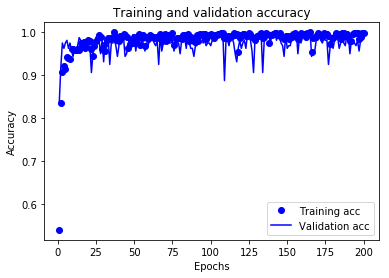

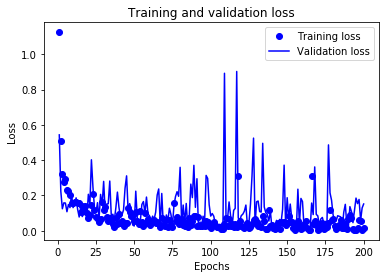

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
from tensorflow.python.keras.models import load_model

best_model = load_model('VGG16_Indus_Fruits_4_classes_100_100_1st Experiment.h5')

In [23]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

20/20 [==============================] - 2s 85ms/step - loss: 0.2765 - categorical_accuracy: 0.9688
Test-set accuracy: 96.88%


In [24]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (320, 100, 100, 3)
Total number of labels: (320, 1)


In [25]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

320/320 [==============================] - 2s 5ms/sample - loss: 0.2765 - categorical_accuracy: 0.9688
Loss on test set:  0.2765091197157744
Accuracy on test set:  0.96875


In [26]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(320,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

320/320 [==============================] - 1s 3ms/sample
(320, 1)
(320, 1)


<Figure size 432x288 with 0 Axes>

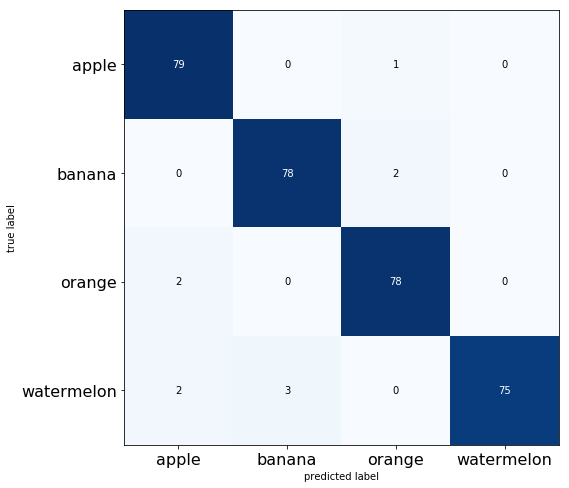

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(4), ['apple', 'banana','orange','watermelon'], fontsize=16)
plt.yticks(range(4), ['apple', 'banana','orange','watermelon'], fontsize=16)
plt.show()